<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>Robust and calibrated estimators with Scikit-Learn</h1>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>)
    <br /><br />
    New York University
</center>

In [5]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [18]:
%%javascript
Reveal.addEventListener("slidechanged", function(event){ window.location.hash = "header"; });

<IPython.core.display.Javascript object>

# Outline

* Motivation
* Bias-variance decomposition 
* Novelty and anomaly detection
* Robust regression
* Calibration

# Motivation

# Bias-variance decomposition

__Theorem.__ For the _squared error loss_, the bias-variance decomposition of the expected
generalization error at $X=\mathbf{x}$ is

$$
\mathbb{E}_{\cal L} \{ Err(\varphi_{\cal L}(\mathbf{x})) \} = \text{noise}(\mathbf{x}) + \text{bias}^2(\mathbf{x}) + \text{var}(\mathbf{x})
$$



<center>
    <img src="img/bv.png" width="50%" />
</center>

## Robustness and variance

- Low variance implies robustness to outliers
- High variance implies sensitivity to data pecularities


## Ensembling reduces variance (and increases robustness)

__Theorem.__ For the _squared error loss_, the bias-variance decomposition of the expected generalization error at $X=x$ is

$$
\mathbb{E}_{\cal L} \{ Err(\varphi_{\cal L}(\mathbf{x})) \} = \text{noise}(\mathbf{x}) + \text{bias}^2(\mathbf{x}) + \text{var}(\mathbf{x})
$$

where
\begin{align*}
\text{noise}(\mathbf{x}) &= Err(\varphi_B(\mathbf{x})), \\
\text{bias}^2(\mathbf{x}) &= (\varphi_B(\mathbf{x}) - \mathbb{E}_{{\cal L},\theta} \{ \varphi_{{\cal L},\theta}(\mathbf{x}) \} )^2, \\
\text{var}(\mathbf{x}) &= \rho(\mathbf{x}) \sigma^2_{{\cal L},\theta}(\mathbf{x}) + \frac{1 - \rho(\mathbf{x})}{M} \sigma^2_{{\cal L},\theta}(\mathbf{x}).
\end{align*}

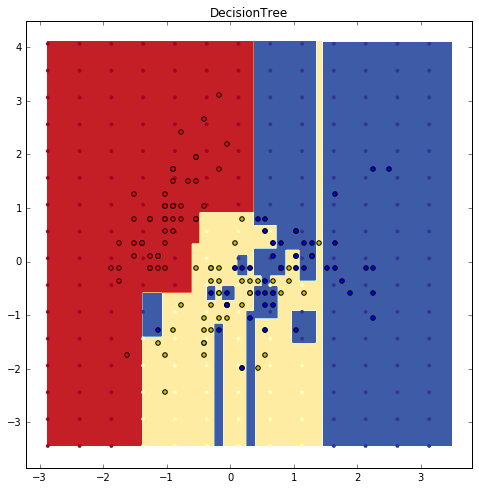

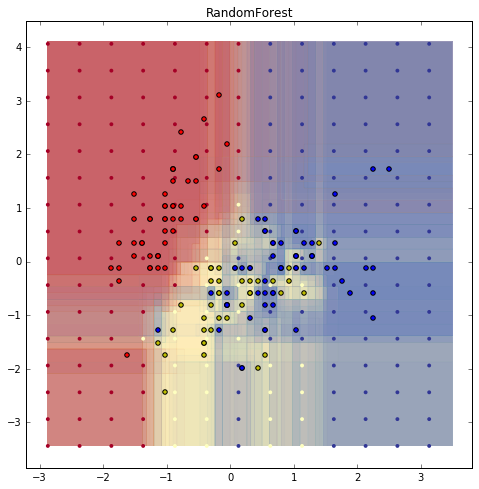

In [21]:
# %load http://scikit-learn.org/dev/_downloads/plot_forest_iris.py

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale

# Parameters
n_classes = 3
n_estimators = 50
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  
plot_step_coarser = 0.5 

# Load data
iris = load_iris()
X = scale(iris.data[:, [0, 1]])
y = iris.target

# Train
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators)]

for model in models:
    clf = model.fit(X, y)
    
    # Plot
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    plt.title(model_title)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    if isinstance(model, DecisionTreeClassifier):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

    for i, c in zip(xrange(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=cmap)

    plt.show()

# Novelty and anomaly detection

In [ ]:
%load http://scikit-learn.org/dev/_downloads/plot_outlier_detection.py

# Robust regression

- robustscaler
- ransac
- huber
- gbrt 

In [ ]:
%load http://scikit-learn.org/dev/_downloads/plot_robust_scaling.py

In [ ]:
%load http://scikit-learn.org/dev/_downloads/plot_ransac.py

In [ ]:
%load http://scikit-learn.org/dev/_downloads/plot_huber_vs_ridge.py

# Calibration

In [ ]:
- lien avec regression

In [ ]:
%load http://scikit-learn.org/dev/_downloads/plot_calibration.py

In [ ]:
questions?